In [71]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from lightning.pytorch.callbacks import Callback
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import lightning.pytorch as pl
import matplotlib.pyplot as plt
import seaborn as sns
from dataset import BdzDataset
from model import LitMLP
sns.set_theme()

In [4]:
dtf = pd.read_csv('data/fsdata.csv')
train, val, test = np.split(dtf.sample(frac=1), [int(.6 * len(dtf)), int(.9 * len(dtf))])
train = BdzDataset(x=train.drop('class', axis=1), y=train['class'])
val = BdzDataset(x=val.drop('class', axis=1), y=val['class'])
test = BdzDataset(x=test.drop('class', axis=1), y=test['class'])

In [49]:
path = "/home/igor/projects/tns_bdz/GD/hidden_opt/version_5/checkpoints/epoch=99-step=100.ckpt"

In [51]:
model = LitMLP(input_dim=39, output_dim=2, opt="BFGS", hiddens=(50,40,30,20))
checkpoint = torch.load(path)
model.load_state_dict(checkpoint["state_dict"])
model.eval()

LitMLP(
  (layers): Sequential(
    (0): Linear(in_features=39, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=40, bias=True)
    (3): Softplus(beta=1, threshold=20)
    (4): Linear(in_features=40, out_features=30, bias=True)
    (5): Softplus(beta=1, threshold=20)
    (6): Linear(in_features=30, out_features=20, bias=True)
    (7): Softplus(beta=1, threshold=20)
    (8): Linear(in_features=20, out_features=2, bias=True)
  )
  (loss): CrossEntropyLoss()
)

In [52]:
def accuracy(pred, target):
    with torch.no_grad():
        acc_pred = torch.argmax(pred, axis=1)
        print(acc_pred)
        acc = torch.sum(acc_pred == target) / target.shape[0]
    return acc.item()

In [67]:
x, y = test[:]
pred = model(x)
accuracy(pred, y)

tensor([0, 0, 0,  ..., 0, 0, 0])


0.9491267800331116

In [68]:
acc_pred = torch.argmax(pred, axis=1)
pred = acc_pred.detach().numpy()
y = y.detach().numpy()
cm = confusion_matrix(pred, y)

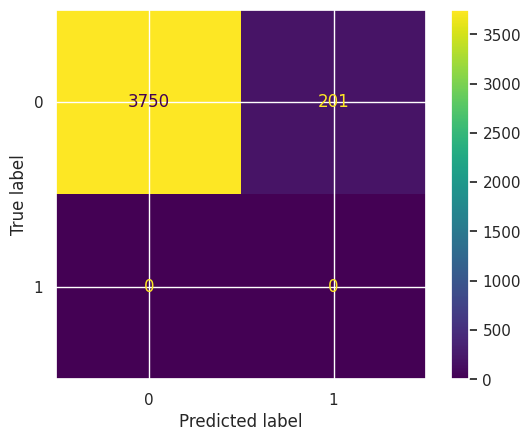

In [69]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [74]:
print(classification_report(y, pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.95      1.00      0.97      3750
     class 1       0.00      0.00      0.00       201

    accuracy                           0.95      3951
   macro avg       0.47      0.50      0.49      3951
weighted avg       0.90      0.95      0.92      3951



/home/igor/projects/tns_bdz/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/projects/tns_bdz/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/projects/tns_bdz/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [81]:
for name, p in model.named_parameters():
    data = p.detach().numpy()
    break

In [85]:
data.shape

(50, 39)

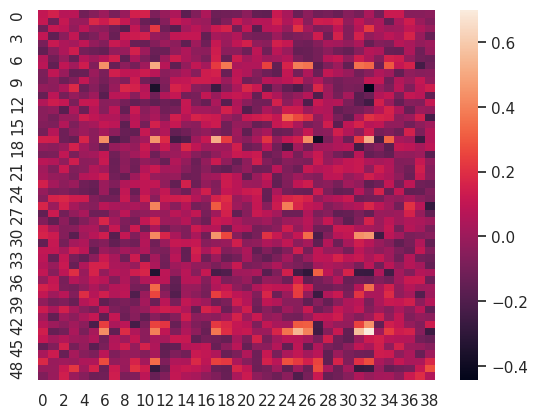

In [84]:
sns.heatmap(data)
plt.show()